In [1]:
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
from scipy import stats
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score ,classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from gensim.models import Word2Vec
import tensorflow as tf

from tensorflow.keras.layers import Dense , SimpleRNN, Flatten ,Dropout, Input, Activation,GRU,LSTM,Conv1D

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from nltk.stem import ARLSTem
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from keras.utils import to_categorical



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))

In [3]:
def get_accuracy_NN(name, trained_model , x_train, y_train, x_test, y_test,y_train_enc,y_test_enc):
  loss,acc=model.evaluate(x_test,y_test_enc)
  print("test loss :", loss)
  print('test accuracy:',acc*100)
  print("____________________________")
  loss,acc=model.evaluate(x_train,y_train_enc)
  print("trainig loss :", loss)
  print('trainig accuracy:',acc*100)
  print("____________________________")

  pred=model.predict(x_test)
  pred_list=[]
  for i in pred:
    pred_list.append(np.argmax(i))
  cf1 = confusion_matrix(y_test,pred_list)
  sns.heatmap(cf1,annot=True,fmt = '.0f')
  plt.xlabel('prediction')
  plt.ylabel('Actual')
  plt.title(name+ ' Confusion Matrix')
  plt.show()
  print("true")
  print(classification_report(y_test,pred_list  ))
  

In [4]:
df= pd.read_excel('/content/original_dataset.xlsx')

In [5]:
df=pd.DataFrame(df)

In [6]:
df.head()

Unnamed: 0                                 review_description  rating  \
0           0                         ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿ®ÿπÿØ ÿßŸÑÿ•ÿµÿØÿßÿ± ÿßŸÑÿ¨ÿØŸäÿØ      -1   
1           1                                  ÿßÿ®ŸÑŸÉŸäÿ¥ŸÜ ÿ≤ÿ®ÿßŸÑŸá ÿ®ÿ¨ÿØ      -1   
2           2                                 ÿ≥Ÿäÿ¶ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ      -1   
3           3  ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥Ÿàÿ£ ŸÉÿßŸÜ ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ Ÿàÿ≥ŸáŸÑ Ÿàÿ®ÿ≥Ÿäÿ∑ ÿß...      -1   
4           4                     ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿπŸÜÿØ ÿßŸÑŸÅÿ™ÿ≠      -1   

       company  
0  alahli_bank  
1  alahli_bank  
2  alahli_bank  
3  alahli_bank  
4  alahli_bank

In [7]:
print(df.shape)
df=df.dropna()
df=df.drop_duplicates()
print(df.shape)

(67127, 4)
(67125, 4)


# **data visualization**

<AxesSubplot:>

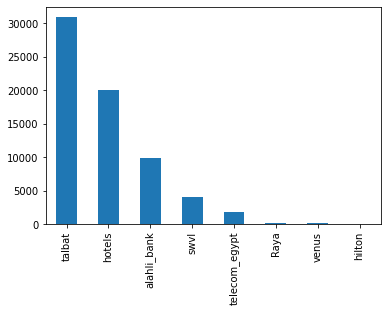

In [8]:
df.company.value_counts().plot(kind='bar')

In [9]:
fig = px.sunburst(df, path=['rating'],title= ' rating')
fig.update_traces(textinfo='label + percent parent')

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='rating', ylabel='count'>

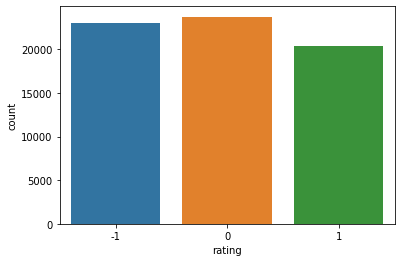

In [10]:
sns.countplot(df.rating)

In [11]:
fig = px.sunburst(df, path=['company', 'rating'],title= 'Relation between company and rating')
fig.update_traces(textinfo='label + percent parent')

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [12]:
emojis = {
    "üôÇ":"Ÿäÿ®ÿ™ÿ≥ŸÖ",
    "üòÇ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üíî":"ŸÇŸÑÿ® ÿ≠ÿ≤ŸäŸÜ",
    "üôÇ":"Ÿäÿ®ÿ™ÿ≥ŸÖ",
    "‚ù§Ô∏è":"ÿ≠ÿ®",
    "‚ù§":"ÿ≠ÿ®",
    "üòç":"ÿ≠ÿ®",
    "üò≠":"Ÿäÿ®ŸÉŸä",
    "üò¢":"ÿ≠ÿ≤ŸÜ",
    "üòî":"ÿ≠ÿ≤ŸÜ",
    "‚ô•":"ÿ≠ÿ®",
    "üíú":"ÿ≠ÿ®",
    "üòÖ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üôÅ":"ÿ≠ÿ≤ŸäŸÜ",
    "üíï":"ÿ≠ÿ®",
    "üíô":"ÿ≠ÿ®",
    "üòû":"ÿ≠ÿ≤ŸäŸÜ",
    "üòä":"ÿ≥ÿπÿßÿØÿ©",
    "üëè":"ŸäÿµŸÅŸÇ",
    "üëå":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "üò¥":"ŸäŸÜÿßŸÖ",
    "üòÄ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòå":"ÿ≠ÿ≤ŸäŸÜ",
    "üåπ":"Ÿàÿ±ÿØÿ©",
    "üôà":"ÿ≠ÿ®",
    "üòÑ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòê":"ŸÖÿ≠ÿßŸäÿØ",
    "‚úå":"ŸÖŸÜÿ™ÿµÿ±",
    "‚ú®":"ŸÜÿ¨ŸÖŸá",
    "ü§î":"ÿ™ŸÅŸÉŸäÿ±",
    "üòè":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üòí":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üôÑ":"ŸÖŸÑŸÑ",
    "üòï":"ÿπÿµÿ®Ÿäÿ©",
    "üòÉ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üå∏":"Ÿàÿ±ÿØÿ©",
    "üòì":"ÿ≠ÿ≤ŸÜ",
    "üíû":"ÿ≠ÿ®",
    "üíó":"ÿ≠ÿ®",
    "üòë":"ŸÖŸÜÿ≤ÿπÿ¨",
    "üí≠":"ÿ™ŸÅŸÉŸäÿ±",
    "üòé":"ÿ´ŸÇÿ©",
    "üíõ":"ÿ≠ÿ®",
    "üò©":"ÿ≠ÿ≤ŸäŸÜ",
    "üí™":"ÿπÿ∂ŸÑÿßÿ™",
    "üëç":"ŸÖŸàÿßŸÅŸÇ",
    "üôèüèª":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üò≥":"ŸÖÿµÿØŸàŸÖ",
    "üëèüèº":"ÿ™ÿµŸÅŸäŸÇ",
    "üé∂":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "üåö":"ÿµŸÖÿ™",
    "üíö":"ÿ≠ÿ®",
    "üôè":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üíò":"ÿ≠ÿ®",
    "üçÉ":"ÿ≥ŸÑÿßŸÖ",
    "‚ò∫":"Ÿäÿ∂ÿ≠ŸÉ",
    "üê∏":"ÿ∂ŸÅÿØÿπ",
    "üò∂":"ŸÖÿµÿØŸàŸÖ",
    "‚úåÔ∏è":"ŸÖÿ±ÿ≠",
    "‚úãüèª":"ÿ™ŸàŸÇŸÅ",
    "üòâ":"ÿ∫ŸÖÿ≤ÿ©",
    "üå∑":"ÿ≠ÿ®",
    "üôÉ":"ŸÖÿ®ÿ™ÿ≥ŸÖ",
    "üò´":"ÿ≠ÿ≤ŸäŸÜ",
    "üò®":"ŸÖÿµÿØŸàŸÖ",
    "üéº ":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "üçÅ":"ŸÖÿ±ÿ≠",
    "üçÇ":"ŸÖÿ±ÿ≠",
    "üíü":"ÿ≠ÿ®",
    "üò™":"ÿ≠ÿ≤ŸÜ",
    "üòÜ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üò£":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "‚ò∫Ô∏è":"ÿ≠ÿ®",
    "üò±":"ŸÉÿßÿ±ÿ´ÿ©",
    "üòÅ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòñ":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üèÉüèº":"Ÿäÿ¨ÿ±Ÿä",
    "üò°":"ÿ∫ÿ∂ÿ®",
    "üö∂":"Ÿäÿ≥Ÿäÿ±",
    "ü§ï":"ŸÖÿ±ÿ∂",
    "‚ÄºÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üïä":"ÿ∑ÿßÿ¶ÿ±",
    "üëåüèª":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚ù£":"ÿ≠ÿ®",
    "üôä":"ŸÖÿµÿØŸàŸÖ",
    "üíÉ":"ÿ≥ÿπÿßÿØÿ© ŸÖÿ±ÿ≠",
    "üíÉüèº":"ÿ≥ÿπÿßÿØÿ© ŸÖÿ±ÿ≠",
    "üòú":"ŸÖÿ±ÿ≠",
    "üëä":"ÿ∂ÿ±ÿ®ÿ©",
    "üòü":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üíñ":"ÿ≠ÿ®",
    "üò•":"ÿ≠ÿ≤ŸÜ",
    "üéª":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "‚úí":"ŸäŸÉÿ™ÿ®",
    "üö∂üèª":"Ÿäÿ≥Ÿäÿ±",
    "üíé":"ÿßŸÑŸÖÿßÿ∏",
    "üò∑":"Ÿàÿ®ÿßÿ° ŸÖÿ±ÿ∂",
    "‚òù":"Ÿàÿßÿ≠ÿØ",
    "üö¨":"ÿ™ÿØÿÆŸäŸÜ",
    "üíê" : "Ÿàÿ±ÿØ",
    "üåû" : "ÿ¥ŸÖÿ≥",
    "üëÜ" : "ÿßŸÑÿßŸàŸÑ",
    "‚ö†Ô∏è" :"ÿ™ÿ≠ÿ∞Ÿäÿ±",
    "ü§ó" : "ÿßÿ≠ÿ™Ÿàÿßÿ°",
    "‚úñÔ∏è": "ÿ∫ŸÑÿ∑",
    "üìç"  : "ŸÖŸÉÿßŸÜ",
    "üë∏" : "ŸÖŸÑŸÉŸá",
    "üëë" : "ÿ™ÿßÿ¨",
    "‚úîÔ∏è" : "ÿµÿ≠",
    "üíå": "ŸÇŸÑÿ®",
    "üò≤" : "ŸÖŸÜÿØŸáÿ¥",
    "üí¶": "ŸÖÿßÿ°",
    "üö´" : "ÿÆÿ∑ÿß",
    "üëèüèª" : "ÿ®ÿ±ÿßŸÅŸà",
    "üèä" :"Ÿäÿ≥ÿ®ÿ≠",
    "üëçüèª": "ÿ™ŸÖÿßŸÖ",
    "‚≠ïÔ∏è" :"ÿØÿßÿ¶ÿ±Ÿá ŸÉÿ®Ÿäÿ±Ÿá",
    "üé∑" : "ÿ≥ÿßŸÉÿ≥ŸÅŸàŸÜ",
    "üëã": "ÿ™ŸÑŸàŸäÿ≠ ÿ®ÿßŸÑŸäÿØ",
    "‚úåüèº": "ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",
    "üåù":"ŸÖÿ®ÿ™ÿ≥ŸÖ",
    "‚ûø"  : "ÿπŸÇÿØŸá ŸÖÿ≤ÿØŸàÿ¨Ÿá",
    "üí™üèº" : "ŸÇŸàŸä",
    "üì©":  "ÿ™ŸàÿßÿµŸÑ ŸÖÿπŸä",
    "‚òïÔ∏è": "ŸÇŸáŸàŸá",
    "üòß" : "ŸÇŸÑŸÇ Ÿà ÿµÿØŸÖÿ©",
    "üó®": "ÿ±ÿ≥ÿßŸÑÿ©",   
    "‚ùóÔ∏è" :"ÿ™ÿπÿ¨ÿ®",
    "üôÜüèª": "ÿßÿ¥ÿßÿ±Ÿá ŸÖŸàÿßŸÅŸÇŸá",
    "üëØ" :"ÿßÿÆŸàÿßÿ™",
    "¬©" :  "ÿ±ŸÖÿ≤",
    "üëµüèΩ" :"ÿ≥ŸäÿØŸá ÿπÿ¨Ÿàÿ≤Ÿá",
    "üê£": "ŸÉÿ™ŸÉŸàÿ™",  
    "üôå": "ÿ™ÿ¥ÿ¨Ÿäÿπ",
    "üôá": "ÿ¥ÿÆÿµ ŸäŸÜÿ≠ŸÜŸä",
    "üëêüèΩ":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",    
    "üëåüèΩ": "ÿ®ÿßŸÑÿ∏ÿ®ÿ∑",
    "‚ÅâÔ∏è" : "ÿßÿ≥ÿ™ŸÜŸÉÿßÿ±",
    "‚öΩÔ∏è": "ŸÉŸàÿ±Ÿá",
    "üï∂" :"ÿ≠ÿ®",
    "üéà" :"ÿ®ÿßŸÑŸàŸÜ",    
    "üéÄ":    "Ÿàÿ±ÿØŸá",
    "üíµ":  "ŸÅŸÑŸàÿ≥",   
    "üòã":  "ÿ¨ÿßÿ¶ÿπ",
    "üòõ":  "Ÿäÿ∫Ÿäÿ∏",
    "üò†":  "ÿ∫ÿßÿ∂ÿ®",
    "‚úçüèª":  "ŸäŸÉÿ™ÿ®",
    "üåæ":  "ÿßÿ±ÿ≤",
    "üë£":  "ÿßÿ´ÿ± ŸÇÿØŸÖŸäŸÜ",
    "‚ùå":"ÿ±ŸÅÿ∂",
    "üçü":"ÿ∑ÿπÿßŸÖ",
    "üë¨":"ÿµÿØÿßŸÇÿ©",
    "üê∞":"ÿßÿ±ŸÜÿ®",
    "‚òÇ":"ŸÖÿ∑ÿ±",
    "‚öú":"ŸÖŸÖŸÑŸÉÿ© ŸÅÿ±ŸÜÿ≥ÿß",
    "üêë":"ÿÆÿ±ŸàŸÅ",
    "üó£":"ÿµŸàÿ™ ŸÖÿ±ÿ™ŸÅÿπ",
    "üëåüèº":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚òò":"ŸÖÿ±ÿ≠",
    "üòÆ":"ÿµÿØŸÖÿ©",
    "üò¶":"ŸÇŸÑŸÇ",
    "‚≠ï":"ÿßŸÑÿ≠ŸÇ",
    "‚úèÔ∏è":"ŸÇŸÑŸÖ",
    "‚Ñπ":"ŸÖÿπŸÑŸàŸÖÿßÿ™",
    "üôçüèª":"ÿ±ŸÅÿ∂",
    "‚ö™Ô∏è":"ŸÜÿ∂ÿßÿ±ÿ© ŸÜŸÇÿßÿ°",
    "üê§":"ÿ≠ÿ≤ŸÜ",
    "üí´":"ŸÖÿ±ÿ≠",
    "üíù":"ÿ≠ÿ®",
    "üçî":"ÿ∑ÿπÿßŸÖ",
    "‚ù§Ô∏é":"ÿ≠ÿ®",
    "‚úàÔ∏è":"ÿ≥ŸÅÿ±",
    "üèÉüèª‚Äç‚ôÄÔ∏è":"Ÿäÿ≥Ÿäÿ±",
    "üç≥":"ÿ∞ŸÉÿ±",
    "üé§":"ŸÖÿßŸäŸÉ ÿ∫ŸÜÿßÿ°",
    "üéæ":"ŸÉÿ±Ÿá",
    "üêî":"ÿØÿ¨ÿßÿ¨ÿ©",
    "üôã":"ÿ≥ÿ§ÿßŸÑ",
    "üìÆ":"ÿ®ÿ≠ÿ±",
    "üíâ":"ÿØŸàÿßÿ°",
    "üôèüèº":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üíÇüèø ":"ÿ≠ÿßÿ±ÿ≥",
    "üé¨":"ÿ≥ŸäŸÜŸÖÿß",
    "‚ô¶Ô∏è":"ŸÖÿ±ÿ≠",
    "üí°":"ŸÇŸÉÿ±ÿ©",
    "‚Äº":"ÿ™ÿπÿ¨ÿ®",
    "üëº":"ÿ∑ŸÅŸÑ",
    "üîë":"ŸÖŸÅÿ™ÿßÿ≠",
    "‚ô•Ô∏è":"ÿ≠ÿ®",
    "üïã":"ŸÉÿπÿ®ÿ©",
    "üêì":"ÿØÿ¨ÿßÿ¨ÿ©",
    "üí©":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üëΩ":"ŸÅÿ∂ÿßÿ¶Ÿä",
    "‚òîÔ∏è":"ŸÖÿ∑ÿ±",
    "üç∑":"ÿπÿµŸäÿ±",
    "üåü":"ŸÜÿ¨ŸÖÿ©",
    "‚òÅÔ∏è":"ÿ≥ÿ≠ÿ®",
    "üëÉ":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üå∫":"ŸÖÿ±ÿ≠",
    "üî™":"ÿ≥ŸÉŸäŸÜÿ©",
    "‚ô®":"ÿ≥ÿÆŸàŸÜŸäÿ©",
    "üëäüèº":"ÿ∂ÿ±ÿ®",
    "‚úè":"ŸÇŸÑŸÖ",
    "üö∂üèæ‚Äç‚ôÄÔ∏è":"Ÿäÿ≥Ÿäÿ±",
    "üëä":"ÿ∂ÿ±ÿ®ÿ©",
    "‚óæÔ∏è":"ŸàŸÇŸÅ",
    "üòö":"ÿ≠ÿ®",
    "üî∏":"ŸÖÿ±ÿ≠",
    "üëéüèª":"ŸÑÿß Ÿäÿπÿ¨ÿ®ŸÜŸä",
    "üëäüèΩ":"ÿ∂ÿ±ÿ®ÿ©",
    "üòô":"ÿ≠ÿ®",
    "üé•":"ÿ™ÿµŸàŸäÿ±",
    "üëâ":"ÿ¨ÿ∞ÿ® ÿßŸÜÿ™ÿ®ÿßŸá",
    "üëèüèΩ":"ŸäÿµŸÅŸÇ",
    "üí™üèª":"ÿπÿ∂ŸÑÿßÿ™",
    "üè¥":"ÿßÿ≥ŸàÿØ",
    "üî•":"ÿ≠ÿ±ŸäŸÇ",  
    "üò¨":"ÿπÿØŸÖ ÿßŸÑÿ±ÿßÿ≠ÿ©",   
    "üëäüèø":"Ÿäÿ∂ÿ±ÿ®",    
    "üåø":"Ÿàÿ±ŸÇŸá ÿ¥ÿ¨ÿ±Ÿá",     
    "‚úãüèº":"ŸÉŸÅ ÿßŸäÿØ",    
    "üëê":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",      
    "‚ò†Ô∏è":"Ÿàÿ¨Ÿá ŸÖÿ±ÿπÿ®",     
    "üéâ":"ŸäŸáŸÜÿ¶",      
    "üîï" :"ÿµÿßŸÖÿ™",
    "üòø":"Ÿàÿ¨Ÿá ÿ≠ÿ≤ŸäŸÜ",      
    "‚òπÔ∏è":"Ÿàÿ¨Ÿá Ÿäÿßÿ¶ÿ≥",     
    "üòò" :"ÿ≠ÿ®",     
    "üò∞" :"ÿÆŸàŸÅ Ÿà ÿ≠ÿ≤ŸÜ",
    "üåº":"Ÿàÿ±ÿØŸá",      
    "üíã":  "ÿ®Ÿàÿ≥Ÿá",
    "üëá":"ŸÑÿßÿ≥ŸÅŸÑ",     
    "‚ù£Ô∏è":"ÿ≠ÿ®",     
    "üéß":"ÿ≥ŸÖÿßÿπÿßÿ™",
    "üìù":"ŸäŸÉÿ™ÿ®",      
    "üòá":"ÿØÿßŸäÿÆ",      
    "üòà":"ÿ±ÿπÿ®",      
    "üèÉ":"Ÿäÿ¨ÿ±Ÿä",      
    "‚úåüèª":"ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",    
    "üî´":"Ÿäÿ∂ÿ±ÿ®",      
    "‚ùóÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üëé":"ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ",      
    "üîê":"ŸÇŸÅŸÑ",      
    "üëà":"ŸÑŸÑŸäŸÖŸäŸÜ",
    "‚Ñ¢":"ÿ±ŸÖÿ≤",    
    "üö∂üèΩ":"Ÿäÿ™ŸÖÿ¥Ÿä",    
    "üòØ":"ŸÖÿ™ŸÅÿßÿ¨ÿ£",  
    "‚úä":"ŸäÿØ ŸÖÿ∫ŸÑŸÇŸá",    
    "üòª":"ÿßÿπÿ¨ÿßÿ®",    
    "üôâ" :"ŸÇÿ±ÿØ",    
    "üëß":"ÿ∑ŸÅŸÑŸá ÿµÿ∫Ÿäÿ±Ÿá",     
    "üî¥":"ÿØÿßÿ¶ÿ±Ÿá ÿ≠ŸÖÿ±ÿßÿ°",      
    "üí™üèΩ":"ŸÇŸàŸá",     
    "üí§":"ŸäŸÜÿßŸÖ",     
    "üëÄ":"ŸäŸÜÿ∏ÿ±",     
    "‚úçüèª":"ŸäŸÉÿ™ÿ®",  
    "‚ùÑÔ∏è":"ÿ™ŸÑÿ¨",
    "üíÄ":"ÿ±ÿπÿ®",   
    "üò§":"Ÿàÿ¨Ÿá ÿπÿßÿ®ÿ≥",      
    "üñã":"ŸÇŸÑŸÖ",      
    "üé©":"ŸÉÿßÿ®",      
    "‚òïÔ∏è":"ŸÇŸáŸàŸá",     
    "üòπ":"ÿ∂ÿ≠ŸÉ",     
    "üíì":"ÿ≠ÿ®",      
    "‚òÑÔ∏è ":"ŸÜÿßÿ±",     
    "üëª":"ÿ±ÿπÿ®",
    "‚ùé":"ÿÆÿ∑ÿ°",
    "ü§Æ":"ÿ≠ÿ≤ŸÜ",
    'üèª':"ÿßÿ≠ŸÖÿ±"
    }

emoticons_to_emoji = {
    ":)" : "üôÇ",
    ":(" : "üôÅ",
    "xD" : "üòÜ",
    ":=(": "üò≠",
    ":'(": "üò¢",
    ":'‚Äë(": "üò¢",
    "XD" : "üòÇ",
    ":D" : "üôÇ",
    "‚ô¨" : "ŸÖŸàÿ≥ŸäŸÇŸä",
    "‚ô°" : "‚ù§",
    "‚òª"  : "üôÇ",
    }

# **data cleaning**

In [13]:
def del_digits_and_pun(value,pun):
    new_value= re.sub('[1-9]','',value)
    for i in pun:
        new_value=new_value.replace(i,' ')
    return new_value

In [14]:
def tokens_review(x,stop_words):
    x=str(x)
    words=word_tokenize(x)
    new_words=[]
    for i in words:
        text = re.sub(r'[^ÿ°-Ÿä ]',' ',i)
        
        if text not in stop_words:
            new_words.append(text)
    return new_words

In [15]:
def remove_diacritics(text):
        arabic_diacritics = re.compile(""" Ÿë    | # Tashdid
                             Ÿé    | # Fatha
                             Ÿã    | # Tanwin Fath
                             Ÿè    | # Damma
                             Ÿå    | # Tanwin Damm
                             Ÿê    | # Kasra
                             Ÿç    | # Tanwin Kasr
                             Ÿí    | # Sukun
                             ŸÄ     # Tatwil/Kashida
                         """, re.VERBOSE)
        text = re.sub(arabic_diacritics, '', str(text))
        return text 

In [16]:
def hendle_emojis(text,emojis):
  li=[]
  for i in word_tokenize(text):
    for x in i :
      if x not in emojis.keys():
        li.append(i)
        break
      else:
        li.append(emojis[x])
  return " ".join(li)
        

delete english punctuations and arabic punctuations from our reviews

In [17]:
hendle_emojis("üòÇüòÇüòÇ", emojis)

'Ÿäÿ∂ÿ≠ŸÉ Ÿäÿ∂ÿ≠ŸÉ Ÿäÿ∂ÿ≠ŸÉ'

In [18]:
arabic_punctuations = """
`√∑√óÿõÿå.<>_()*&^%][ŸÄÿå/:ÿü.,'{}~¬¶+|!‚Äù‚Ä¶‚Äú‚Äì#.ŸÄ
"""

english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations
punctuations_list
list_pun=[i for i in punctuations_list]


df.review_description=df.review_description.apply(del_digits_and_pun,args=[list_pun])



# ** staming  reviwe**

In [19]:
def preprossing (review):
  words=word_tokenize(review)
  new_words=[]
  stop_words=stopwords.words('arabic')

  for i in words:
    stemmer = ARLSTem()
    word = stemmer.stem(i)
    if i in stop_words:
      continue 
    new_words.append(word)

  return " ".join(new_words)




In [20]:
import nltk

df['clean']=df.review_description.apply(preprossing)
df['clean']=df.clean.apply(hendle_emojis,args=[emojis])



In [21]:
df.head()

Unnamed: 0                                 review_description  rating  \
0           0                         ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿ®ÿπÿØ ÿßŸÑÿ•ÿµÿØÿßÿ± ÿßŸÑÿ¨ÿØŸäÿØ      -1   
1           1                                  ÿßÿ®ŸÑŸÉŸäÿ¥ŸÜ ÿ≤ÿ®ÿßŸÑŸá ÿ®ÿ¨ÿØ      -1   
2           2                                 ÿ≥Ÿäÿ¶ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ      -1   
3           3  ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥Ÿàÿ£ ŸÉÿßŸÜ ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ Ÿàÿ≥ŸáŸÑ Ÿàÿ®ÿ≥Ÿäÿ∑ ÿß...      -1   
4           4                     ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿπŸÜÿØ ÿßŸÑŸÅÿ™ÿ≠      -1   

       company                                              clean  
0  alahli_bank                                   ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿµÿØÿ± ÿ¨ÿØŸäÿØ  
1  alahli_bank                                     ÿ®ŸÑŸÉŸäÿ¥ ÿ≤ÿ®ÿßŸÑ ÿ®ÿ¨ÿØ  
2  alahli_bank                                   ÿ≥Ÿäÿ¶ ÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ  
3  alahli_bank  ÿßÿ≥ŸÅ ÿ™ÿ∑ÿ®ŸäŸÇ ÿßÿ≥Ÿàÿß ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ ÿ≥ŸáŸÑ ÿ®ÿ≥Ÿäÿ∑ ŸÖÿπŸÇÿØ ŸÅÿ™ÿ≠ ŸÖÿπÿß ...  
4  alahli_bank                             ÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ŸÅÿ™ÿ≠

In [22]:
x=df['clean'].tolist()


['ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿµÿØÿ± ÿ¨ÿØŸäÿØ',
 'ÿ®ŸÑŸÉŸäÿ¥ ÿ≤ÿ®ÿßŸÑ ÿ®ÿ¨ÿØ',
 'ÿ≥Ÿäÿ¶ ÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ',
 'ÿßÿ≥ŸÅ ÿ™ÿ∑ÿ®ŸäŸÇ ÿßÿ≥Ÿàÿß ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ ÿ≥ŸáŸÑ ÿ®ÿ≥Ÿäÿ∑ ŸÖÿπŸÇÿØ ŸÅÿ™ÿ≠ ŸÖÿπÿß ÿ®ÿ≥ŸáŸàŸÑ ÿ™ÿ¨ÿØ ÿÆÿØŸÖ ŸÖÿ™ÿßÿ≠',
 'ÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ŸÅÿ™ÿ≠',
 'ŸÖÿ±ÿ±ÿ±ÿ± ÿ≤ŸÇ ÿßÿÆÿ± ÿ≠ÿØŸäÿ´ ŸÅÿ™ÿ≠ŸÑŸä ÿßÿ®ÿØ ÿ±ŸÅÿ∂ ÿßŸä ŸÉŸÑŸÖ ŸÖÿ±Ÿàÿ± ŸÉÿ™ÿ® ÿßŸà ÿ±ŸÇŸÖ ÿ®ÿ∑ÿßŸÇ ÿßŸáŸÑŸä ÿÆÿ±ÿ®ÿ™ ÿ∫ŸÑÿ® ŸÜÿßÿ≥ ŸÉÿßŸÜ ŸÖÿπÿ™ŸÖÿØ ÿßÿ≥ŸÅ',
 'ÿ™ÿ∑ÿ®ŸäŸÇ ÿ¥ÿ™ÿ∫ŸÑ ÿπŸÖŸÑ ÿ≥ÿ¨ŸäŸÑ ÿØÿÆŸàŸÑ ÿ≠ÿ≥ÿßÿ®Ÿä ŸÅÿ™ÿ≠ ÿ¥ŸàŸÅŸà ÿ≠ŸÑ ÿßŸÜÿß ŸÖÿπÿ∑ŸÑ',
 'ÿßÿ∞ÿß ŸÇŸÖÿ™ ÿ®ŸÅÿ™ÿ≠ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ∑ŸÑÿ® ÿ≠ÿØŸäÿ´ ÿßÿ∞ÿß ÿ∂ÿ∫ÿ∑ ÿ™ÿ≠ÿØŸäÿ´ ŸÇÿ®ŸÑ ÿ™ÿ≠ÿØŸäÿ´ ŸÑÿßŸáŸà ŸÑŸÑŸä ŸÅÿ™ÿ≠ ŸÑÿßŸáŸà ŸÑŸÑŸä ÿ≠ÿØÿ´ Ÿàÿ¥ ŸÖÿ¥ŸÉŸÑ',
 'ÿßÿ≥ŸÅ ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿßŸÖÿ≥ ÿßÿ≠ŸàŸÑ ÿ≥ÿ™ÿÆÿØŸÖ ŸÖÿßŸÅŸä ÿßÿ™ŸàÿßÿµŸÑ ÿÆÿØŸÖ ÿπŸÖŸÑÿßÿ° ŸÇÿßŸÑ ÿ≠ÿ∞ŸÅ ŸÜÿ≤ŸÑ ÿ¨ÿØŸäÿØ ŸäŸÖŸÉ ŸäŸÉŸà ÿ≠ÿØŸäÿ´ ŸÜŸÅÿ≥ ŸÖÿ¥ŸÉŸÑ ŸÖÿßÿßŸÜÿ≠ŸÑ',
 'ÿµÿ±ÿßÿ≠ ÿ¥Ÿä ŸÖŸàÿ≥ŸÅ']

In [23]:
tfidfconverter= TfidfVectorizer(max_features=1000,ngram_range=(1,3))
X_Vec = tfidfconverter.fit_transform(x)
X_Vec = pd.DataFrame.sparse.from_spmatrix(X_Vec)
Y=df["rating"]


# **split dataset**

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_Vec,Y,random_state=42,test_size=0.02,shuffle=True)


Testing accuracy   : 86.15040953090097 %
MSE [TEST]          : 0.33730454206999255
Training accuracy  : 85.6860539357271 %
MSE [TRAIN]         : 0.3402906570186373
precision :  0.8615040953090097
recall    :  0.8615040953090097
f1_score  :  0.8615040953090097


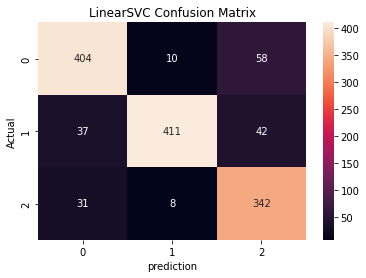

              precision    recall  f1-score   support

          -1       0.86      0.86      0.86     22563
           0       0.95      0.82      0.88     23261
           1       0.78      0.89      0.83     19958

    accuracy                           0.86     65782
   macro avg       0.86      0.86      0.86     65782
weighted avg       0.86      0.86      0.86     65782

              precision    recall  f1-score   support

          -1       0.86      0.86      0.86       472
           0       0.96      0.84      0.89       490
           1       0.77      0.90      0.83       381

    accuracy                           0.86      1343
   macro avg       0.86      0.86      0.86      1343
weighted avg       0.87      0.86      0.86      1343



In [25]:

from sklearn.svm import LinearSVC
trained_clf_svc = LinearSVC().fit(x_train, y_train)
get_accuracy('LinearSVC',trained_clf_svc,x_train, y_train, x_test, y_test)


# **features extraction  word2vec**

In [26]:
from gensim.models import Word2Vec
sents=[]
dim_num=100
for i in df.clean:
  sents.append(word_tokenize(i))
model=Word2Vec(sentences=sents, window=5, min_count=1, workers=4,size=dim_num)


In [27]:
X=np.zeros((dim_num,), dtype=float)

for i in (df.clean):
  counter=0
  sum=np.zeros((100,), dtype=float)
  for x in word_tokenize(i) :
    sum+=model.wv[x]
    counter+=1
  if counter==0 :
    X=np.vstack((X,sum))
  else:
    X=np.vstack((X,sum/counter))
X= np.delete(X, (0), axis=0)
y=df.rating 
X.shape

  

(67125, 100)

**# get X and y**

In [28]:
from sklearn.model_selection import train_test_split

def encod(x):
  if x==-1:
    return 0
  if x== 0:
    return 1
  return 2
y=df.rating
y=y.apply(encod)
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.02,shuffle=True)
y_train_enc = tf.keras.utils.to_categorical(y_train)
y_test_enc=tf.keras.utils.to_categorical(y_test)


# **LinearSVC**

In [29]:

from sklearn.svm import LinearSVC
trained_clf_svc = LinearSVC().fit(x_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Testing accuracy   : 81.3849590469099 %
MSE [TEST]          : 0.3827252419955324
Training accuracy  : 81.399166945365 %
MSE [TRAIN]         : 0.37280715089234134
precision :  0.813849590469099
recall    :  0.813849590469099
f1_score  :  0.813849590469099


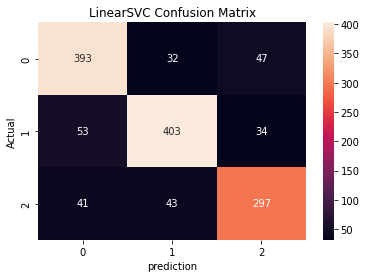

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     22563
           1       0.84      0.81      0.82     23261
           2       0.79      0.79      0.79     19958

    accuracy                           0.81     65782
   macro avg       0.81      0.81      0.81     65782
weighted avg       0.81      0.81      0.81     65782

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       472
           1       0.84      0.82      0.83       490
           2       0.79      0.78      0.78       381

    accuracy                           0.81      1343
   macro avg       0.81      0.81      0.81      1343
weighted avg       0.81      0.81      0.81      1343



In [30]:
get_accuracy('LinearSVC',trained_clf_svc,x_train, y_train, x_test, y_test)

# **apply decision tree model**

Testing accuracy   : 78.40655249441548 %
MSE [TEST]          : 0.4973938942665674
Training accuracy  : 78.53668176704873 %
MSE [TRAIN]         : 0.48415980055334285
precision :  0.7840655249441548
recall    :  0.7840655249441548
f1_score  :  0.7840655249441548


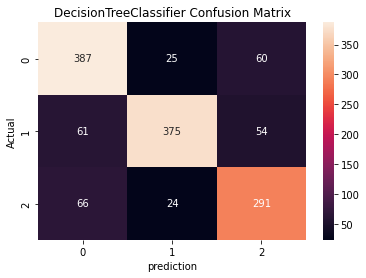

              precision    recall  f1-score   support

           0       0.76      0.83      0.80     22563
           1       0.88      0.75      0.81     23261
           2       0.72      0.78      0.75     19958

    accuracy                           0.79     65782
   macro avg       0.79      0.79      0.78     65782
weighted avg       0.79      0.79      0.79     65782

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       472
           1       0.88      0.77      0.82       490
           2       0.72      0.76      0.74       381

    accuracy                           0.78      1343
   macro avg       0.79      0.78      0.78      1343
weighted avg       0.79      0.78      0.79      1343



In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split= 2).fit(x_train,y_train)
get_accuracy('DecisionTreeClassifier',clf,x_train, y_train, x_test, y_test)


# **random forest model**

Testing accuracy   : 83.91660461653015 %
MSE [TEST]          : 0.3730454206999255
Training accuracy  : 84.78155118421454 %
MSE [TRAIN]         : 0.34482077163965824
precision :  0.8391660461653015
recall    :  0.8391660461653015
f1_score  :  0.8391660461653017


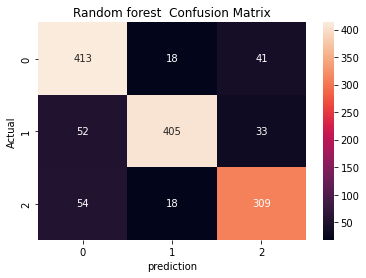

              precision    recall  f1-score   support

           0       0.81      0.89      0.85     22563
           1       0.92      0.82      0.87     23261
           2       0.81      0.83      0.82     19958

    accuracy                           0.85     65782
   macro avg       0.85      0.85      0.85     65782
weighted avg       0.85      0.85      0.85     65782

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       472
           1       0.92      0.83      0.87       490
           2       0.81      0.81      0.81       381

    accuracy                           0.84      1343
   macro avg       0.84      0.84      0.84      1343
weighted avg       0.84      0.84      0.84      1343



In [32]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=9,min_samples_leaf=5,min_samples_split=3).fit(x_train,y_train)
get_accuracy('Random forest ',model,x_train, y_train, x_test, y_test)


# **model 1 neural network**

In [33]:

model=Sequential()
model.add(Dense( 64 ,input_shape=(100,),activation='relu' ))
model.add(Dense(32, activation='relu',kernel_regularizer='l1'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy' ,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 9,123
Trainable params: 9,123
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(x_train,y_train_enc,batch_size=256 ,epochs=150)


Epoch 1/150
257/257 [==============================] - 2s 3ms/step - loss: 1.6164 - accuracy: 0.7824
Epoch 2/150
257/257 [==============================] - 1s 3ms/step - loss: 0.6423 - accuracy: 0.8143
Epoch 3/150
257/257 [==============================] - 1s 3ms/step - loss: 0.5696 - accuracy: 0.8204
Epoch 4/150
257/257 [==============================] - 1s 3ms/step - loss: 0.5405 - accuracy: 0.8240
Epoch 5/150
257/257 [==============================] - 1s 3ms/step - loss: 0.5205 - accuracy: 0.8278
Epoch 6/150
257/257 [==============================] - 1s 3ms/step - loss: 0.5086 - accuracy: 0.8288
Epoch 7/150
257/257 [==============================] - 1s 3ms/step - loss: 0.4997 - accuracy: 0.8310
Epoch 8/150
257/257 [==============================] - 1s 2ms/step - loss: 0.4923 - accuracy: 0.8316
Epoch 9/150
257/257 [==============================] - 1s 2ms/step - loss: 0.4868 - accuracy: 0.8328
Epoch 10/150
257/257 [==============================] - 1s 3ms/step - loss: 0.4816 - accura

42/42 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8585
test loss : 0.4010699987411499
test accuracy: 85.85256934165955
____________________________
2056/2056 [==============================] - 4s 2ms/step - loss: 0.3925 - accuracy: 0.8585
trainig loss : 0.392451673746109
trainig accuracy: 85.8532726764679
____________________________
42/42 [==============================] - 0s 1ms/step


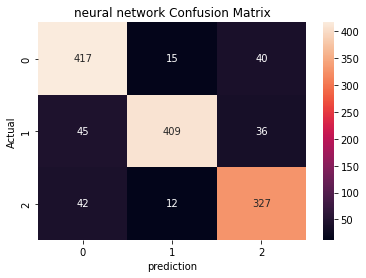

true
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       472
           1       0.94      0.83      0.88       490
           2       0.81      0.86      0.83       381

    accuracy                           0.86      1343
   macro avg       0.86      0.86      0.86      1343
weighted avg       0.86      0.86      0.86      1343



In [35]:
get_accuracy_NN("neural network",model,x_train,y_train,x_test,y_test,y_train_enc,y_test_enc)

# ***model 2 neural ntework***

In [36]:

model=Sequential()
model.add(Dense( 120,input_shape=(100,),activation='relu' ))

model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))


model.compile(optimizer = 'adam' ,loss = 'categorical_crossentropy' ,metrics=['accuracy'])



Epoch 1/50
257/257 [==============================] - 2s 4ms/step - loss: 0.5339 - accuracy: 0.7976
Epoch 2/50
257/257 [==============================] - 1s 5ms/step - loss: 0.4441 - accuracy: 0.8335
Epoch 3/50
257/257 [==============================] - 1s 5ms/step - loss: 0.4259 - accuracy: 0.8391
Epoch 4/50
257/257 [==============================] - 1s 4ms/step - loss: 0.4159 - accuracy: 0.8418
Epoch 5/50
257/257 [==============================] - 1s 4ms/step - loss: 0.4102 - accuracy: 0.8444
Epoch 6/50
257/257 [==============================] - 1s 5ms/step - loss: 0.4034 - accuracy: 0.8472
Epoch 7/50
257/257 [==============================] - 1s 5ms/step - loss: 0.3990 - accuracy: 0.8486
Epoch 8/50
257/257 [==============================] - 1s 3ms/step - loss: 0.3948 - accuracy: 0.8493
Epoch 9/50
257/257 [==============================] - 1s 3ms/step - loss: 0.3907 - accuracy: 0.8513
Epoch 10/50
257/257 [==============================] - 1s 3ms/step - loss: 0.3871 - accuracy: 0.8516

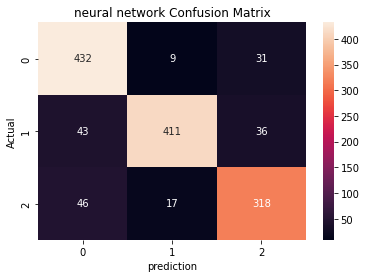

true
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       472
           1       0.94      0.84      0.89       490
           2       0.83      0.83      0.83       381

    accuracy                           0.86      1343
   macro avg       0.87      0.86      0.86      1343
weighted avg       0.87      0.86      0.86      1343



In [37]:
model.fit(x_train,y_train_enc,batch_size=256 ,epochs=50)
get_accuracy_NN("neural network",model,x_train,y_train,x_test,y_test,y_train_enc,y_test_enc)

CNN

In [38]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten
# Instantiate your model as usual
model = Sequential()
model.add(Conv2D(
                 filters=64,  
                 kernel_size=2,              
                 input_shape=(10,10,1),     
                 activation='relu')
)

model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(16, activation='relu'))
# End this multiclass model with 3 outputs and softmax
model.add(Dense(3, activation='softmax'))

model.summary ()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 64)          320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           4616      
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                25152     
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 3)                 51        
                                                                 
Total params: 31,179
Trainable params: 31,179
Non-trai

In [39]:
model.compile(optimizer = 'adam' ,loss = 'categorical_crossentropy' ,metrics=['accuracy'])
model.fit(x_train.reshape(-1,10,10,1),y_train_enc,batch_size=256 ,epochs=7)

Epoch 1/7
257/257 [==============================] - 14s 50ms/step - loss: 0.5441 - accuracy: 0.7976
Epoch 2/7
257/257 [==============================] - 13s 49ms/step - loss: 0.4510 - accuracy: 0.8306
Epoch 3/7
257/257 [==============================] - 13s 49ms/step - loss: 0.4339 - accuracy: 0.8355
Epoch 4/7
257/257 [==============================] - 13s 49ms/step - loss: 0.4247 - accuracy: 0.8381
Epoch 5/7
257/257 [==============================] - 13s 49ms/step - loss: 0.4187 - accuracy: 0.8398
Epoch 6/7
257/257 [==============================] - 14s 55ms/step - loss: 0.4136 - accuracy: 0.8420
Epoch 7/7
257/257 [==============================] - 13s 49ms/step - loss: 0.4088 - accuracy: 0.8438


In [40]:

pred=model.predict(x_test.reshape(-1,10,10,1))
pred_list=[]
for i in pred:
  pred_list.append(np.argmax(i))
from sklearn.metrics import accuracy_score
print("test accuracy : ", accuracy_score(y_test,pred_list)*100)
print("_______________________")
print(classification_report(y_test,pred_list  ))
print("confusion  matrix")
print(confusion_matrix(pred_list, y_test))

42/42 [==============================] - 0s 2ms/step
test accuracy :  84.5867460908414
_______________________
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       472
           1       0.96      0.79      0.87       490
           2       0.79      0.86      0.82       381

    accuracy                           0.85      1343
   macro avg       0.85      0.85      0.85      1343
weighted avg       0.86      0.85      0.85      1343

confusion  matrix
[[419  57  43]
 [  8 388   9]
 [ 45  45 329]]


rnn

In [41]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense , SimpleRNN, Flatten ,Dropout, Input, Activation

In [42]:
input_shape = ( 100,1)
batch_size = 100
units = 256
dropout = 0.2

In [43]:
model = Sequential()
model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               66048     
                                                                 
 dense_12 (Dense)            (None, 3)                 771       
                                                                 
 activation (Activation)     (None, 3)                 0         
                                                                 
Total params: 66,819
Trainable params: 66,819
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.CategoricalCrossentropy())
# train the network
model.fit(x_train, y_train_enc, epochs=2, batch_size=batch_size,)


Epoch 1/2
658/658 [==============================] - 103s 154ms/step - loss: 0.7164
Epoch 2/2
658/658 [==============================] - 101s 153ms/step - loss: 0.6038


# **GRU model**

In [45]:
model_gru= Sequential()
model_gru.add(Input(shape=(10,10)))
model_gru.add(GRU( 150,activation='relu'))

model_gru.add(Dense(3))
model_gru.add(Activation('softmax'))
model_gru.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 150)               72900     
                                                                 
 dense_13 (Dense)            (None, 3)                 453       
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
Total params: 73,353
Trainable params: 73,353
Non-trainable params: 0
_________________________________________________________________


In [46]:
x_test=np.array(x_test).reshape(-1,10,10)
x_train=np.array(x_train).reshape(-1,10,10)

In [47]:
model_gru.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy()
              , metrics=['accuracy'])
model_gru.fit(x_train,y_train_enc,batch_size=64,epochs=20)

Epoch 1/20
1028/1028 [==============================] - 24s 21ms/step - loss: 0.5390 - accuracy: 0.7973
Epoch 2/20
1028/1028 [==============================] - 24s 23ms/step - loss: 0.4503 - accuracy: 0.8292
Epoch 3/20
1028/1028 [==============================] - 21s 20ms/step - loss: 0.4358 - accuracy: 0.8337
Epoch 4/20
1028/1028 [==============================] - 22s 22ms/step - loss: 0.4255 - accuracy: 0.8371
Epoch 5/20
1028/1028 [==============================] - 24s 23ms/step - loss: 0.4167 - accuracy: 0.8392
Epoch 6/20
1028/1028 [==============================] - 22s 22ms/step - loss: 0.4098 - accuracy: 0.8423
Epoch 7/20
1028/1028 [==============================] - 21s 20ms/step - loss: 0.4035 - accuracy: 0.8451
Epoch 8/20
1028/1028 [==============================] - 22s 22ms/step - loss: 0.3979 - accuracy: 0.8476
Epoch 9/20
1028/1028 [==============================] - 24s 23ms/step - loss: 0.3937 - accuracy: 0.8485
Epoch 10/20
1028/1028 [==============================] - 22s 22m

42/42 [==============================] - 0s 5ms/step - loss: 0.3837 - accuracy: 0.8600
test loss : 0.38370221853256226
test accuracy: 86.00149154663086
____________________________
2056/2056 [==============================] - 12s 6ms/step - loss: 0.3407 - accuracy: 0.8662
trainig loss : 0.34073570370674133
trainig accuracy: 86.62248253822327
____________________________
42/42 [==============================] - 1s 10ms/step


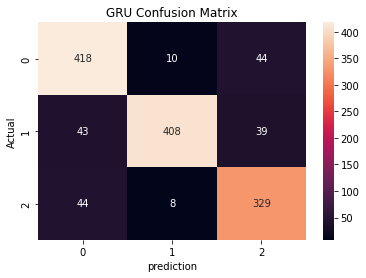

true
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       472
           1       0.96      0.83      0.89       490
           2       0.80      0.86      0.83       381

    accuracy                           0.86      1343
   macro avg       0.86      0.86      0.86      1343
weighted avg       0.87      0.86      0.86      1343



In [48]:
loss,acc=model_gru.evaluate(x_test,y_test_enc)
print("test loss :", loss)
print('test accuracy:',acc*100)
print("____________________________")
loss,acc=model_gru.evaluate(x_train,y_train_enc)
print("trainig loss :", loss)
print('trainig accuracy:',acc*100)
print("____________________________")

pred=model_gru.predict(x_test)
pred_list=[]
for i in pred:
  pred_list.append(np.argmax(i))
cf1 = confusion_matrix(y_test,pred_list)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("GRU"+ ' Confusion Matrix')
plt.show()
print("true")
print(classification_report(y_test,pred_list  ))

# **LSTM**

In [49]:
model_lstm= Sequential()
model_lstm.add(Input(shape=(10,10)))
model_lstm.add(LSTM(120  ,activation='relu'))
model_lstm.add(Dense(3))
model_lstm.add(Activation('softmax'))
model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120)               62880     
                                                                 
 dense_14 (Dense)            (None, 3)                 363       
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 63,243
Trainable params: 63,243
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy()
              , metrics=['accuracy'])



In [51]:
model_lstm.fit(x_train,y_train_enc,batch_size=64,epochs=10)

Epoch 1/10
1028/1028 [==============================] - 20s 18ms/step - loss: 0.5605 - accuracy: 0.7864
Epoch 2/10
1028/1028 [==============================] - 21s 21ms/step - loss: 0.4620 - accuracy: 0.8238
Epoch 3/10
1028/1028 [==============================] - 19s 18ms/step - loss: 0.4453 - accuracy: 0.8307
Epoch 4/10
1028/1028 [==============================] - 20s 20ms/step - loss: 0.4354 - accuracy: 0.8342
Epoch 5/10
1028/1028 [==============================] - 19s 18ms/step - loss: 0.4279 - accuracy: 0.8362
Epoch 6/10
1028/1028 [==============================] - 21s 21ms/step - loss: 0.4216 - accuracy: 0.8392
Epoch 7/10
1028/1028 [==============================] - 19s 18ms/step - loss: 0.4167 - accuracy: 0.8401
Epoch 8/10
1028/1028 [==============================] - 20s 19ms/step - loss: 0.4117 - accuracy: 0.8427
Epoch 9/10
1028/1028 [==============================] - 18s 18ms/step - loss: 0.4075 - accuracy: 0.8439
Epoch 10/10
1028/1028 [==============================] - 22s 21m

42/42 [==============================] - 0s 5ms/step - loss: 0.3988 - accuracy: 0.8488
test loss : 0.3987911343574524
test accuracy: 84.88458395004272
____________________________
2056/2056 [==============================] - 12s 6ms/step - loss: 0.3941 - accuracy: 0.8480
trainig loss : 0.3941444158554077
trainig accuracy: 84.80435609817505
____________________________
42/42 [==============================] - 0s 5ms/step


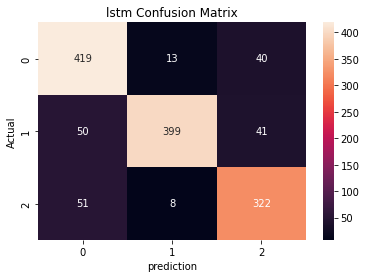

true
              precision    recall  f1-score   support

           0       0.81      0.89      0.84       472
           1       0.95      0.81      0.88       490
           2       0.80      0.85      0.82       381

    accuracy                           0.85      1343
   macro avg       0.85      0.85      0.85      1343
weighted avg       0.86      0.85      0.85      1343



In [52]:
loss,acc=model_lstm.evaluate(x_test,y_test_enc)
print("test loss :", loss)
print('test accuracy:',acc*100)
print("____________________________")
loss,acc=model_lstm.evaluate(x_train,y_train_enc)
print("trainig loss :", loss)
print('trainig accuracy:',acc*100)
print("____________________________")

pred=model_lstm.predict(x_test)
pred_list=[]
for i in pred:
  pred_list.append(np.argmax(i))
cf1 = confusion_matrix(y_test,pred_list)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("lstm"+ ' Confusion Matrix')
plt.show()
print("true")
print(classification_report(y_test,pred_list  ))

RNN model

In [53]:
model_RNN= Sequential()
model_RNN.add(Input(shape=(10,10)))
model_RNN.add(LSTM(120  ,activation='relu'))
model_RNN.add(Dense(3))
model_RNN.add(Activation('softmax'))
model_RNN.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 120)               62880     
                                                                 
 dense_15 (Dense)            (None, 3)                 363       
                                                                 
 activation_3 (Activation)   (None, 3)                 0         
                                                                 
Total params: 63,243
Trainable params: 63,243
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_RNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy()
              , metrics=['accuracy'])

In [55]:
model_RNN.fit(x_train,y_train_enc,batch_size=64,epochs=10)

Epoch 1/10
1028/1028 [==============================] - 22s 20ms/step - loss: 0.5563 - accuracy: 0.7893
Epoch 2/10
1028/1028 [==============================] - 18s 18ms/step - loss: 0.4574 - accuracy: 0.8253
Epoch 3/10
1028/1028 [==============================] - 21s 21ms/step - loss: 0.4442 - accuracy: 0.8297
Epoch 4/10
1028/1028 [==============================] - 18s 18ms/step - loss: 0.4348 - accuracy: 0.8330
Epoch 5/10
1028/1028 [==============================] - 20s 20ms/step - loss: 0.4263 - accuracy: 0.8371
Epoch 6/10
1028/1028 [==============================] - 18s 18ms/step - loss: 0.4210 - accuracy: 0.8381
Epoch 7/10
1028/1028 [==============================] - 21s 21ms/step - loss: 0.4172 - accuracy: 0.8392
Epoch 8/10
1028/1028 [==============================] - 19s 19ms/step - loss: 0.4120 - accuracy: 0.8408
Epoch 9/10
1028/1028 [==============================] - 20s 19ms/step - loss: 0.4085 - accuracy: 0.8442
Epoch 10/10
1028/1028 [==============================] - 20s 20m

42/42 [==============================] - 0s 5ms/step - loss: 0.4082 - accuracy: 0.8555
test loss : 0.4082413911819458
test accuracy: 85.5547308921814
____________________________
2056/2056 [==============================] - 14s 7ms/step - loss: 0.3913 - accuracy: 0.8497
trainig loss : 0.3913385272026062
trainig accuracy: 84.96853113174438
____________________________
42/42 [==============================] - 0s 5ms/step


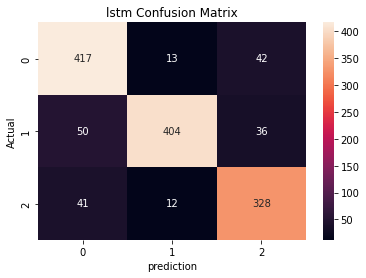

true
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       472
           1       0.94      0.82      0.88       490
           2       0.81      0.86      0.83       381

    accuracy                           0.86      1343
   macro avg       0.86      0.86      0.85      1343
weighted avg       0.86      0.86      0.86      1343



In [57]:
loss,acc=model_RNN.evaluate(x_test,y_test_enc)
print("test loss :", loss)
print('test accuracy:',acc*100)
print("____________________________")
loss,acc=model_RNN.evaluate(x_train,y_train_enc)
print("trainig loss :", loss)
print('trainig accuracy:',acc*100)
print("____________________________")

pred=model_RNN.predict(x_test)
pred_list=[]
for i in pred:
  pred_list.append(np.argmax(i))
cf1 = confusion_matrix(y_test,pred_list)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("lstm"+ ' Confusion Matrix')
plt.show()
print("true")
print(classification_report(y_test,pred_list  ))